# Data Science Regression Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,10)

# Data Load

In [5]:
df1=pd.read_csv('Bengaluru_House_Data.csv')

In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df1['location'].nunique()

1305

# Remove features that are not required in our model

In [11]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [12]:
df2=df1.drop(['area_type', 'availability','balcony','society'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df2.shape

(13320, 5)

# data Cleaning

In [14]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df3=df2.dropna()
df3.shape

(13246, 5)

In [16]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df3['bhk']=df3['size'].apply(lambda x: (int)(x.split(' ')[0]))

<ipython-input-18-bd4011a5724d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: (int)(x.split(' ')[0]))


In [19]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def is_float(x):
    try:
        float(x)
    except:
       return False
    return True

In [24]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2;
    try:
        return float(x)
    except:
        return None

In [26]:
convert_sqft_to_num('2910')

2910.0

In [27]:
convert_sqft_to_num('200-400')

300.0

In [28]:
convert_sqft_to_num('349perch')

In [29]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [30]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

# Feature Engineering

In [31]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
len(df5['location'].unique())

1304

In [34]:
df5['location']=df5['location'].apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [35]:
type(location_stats)

pandas.core.series.Series

In [36]:
len(location_stats[location_stats<=10])

1052

In [37]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [38]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [39]:
len(df5.location.unique())

242

In [40]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [41]:
df5.shape

(13246, 7)

In [42]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [43]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=False)
    return df_out

df7=remove_outliers(df6)
df7.head()
    

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [45]:
df7.shape

(10241, 7)

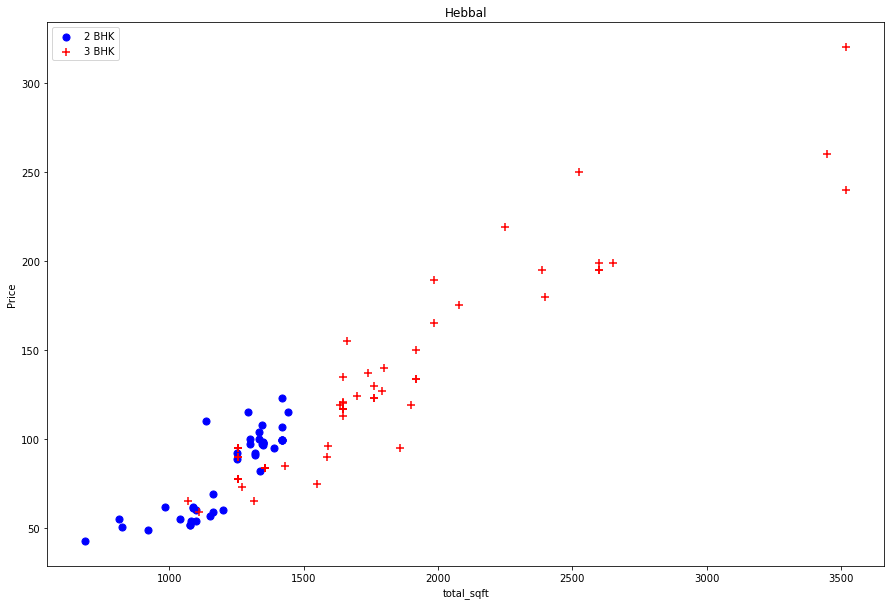

In [54]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='o',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK',s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    
plot_scatter_chart(df7,'Hebbal')
    

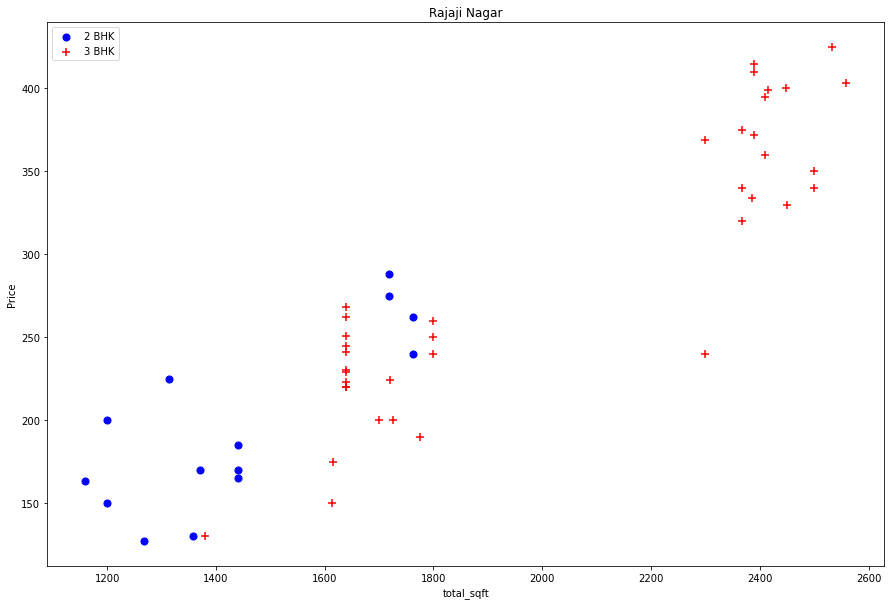

In [167]:
plot_scatter_chart(df7,'Rajaji Nagar')
plt.savefig('Rajaji_Nagar.png',dpi=100)

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [68]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
                stats=bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    
df8=remove_bhk_outliers(df7)
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [69]:
df8.shape

(7329, 7)

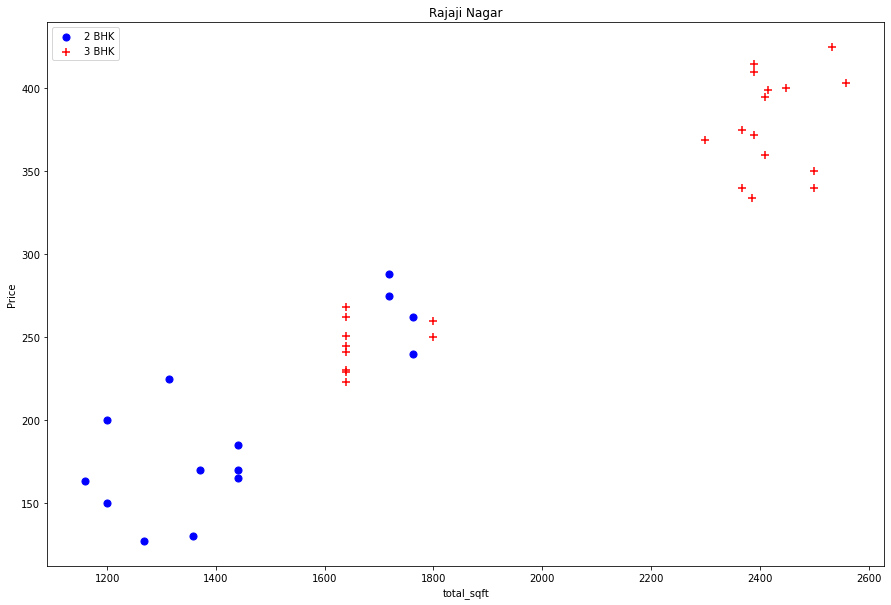

In [169]:
plot_scatter_chart(df8,'Rajaji Nagar')
plt.savefig('Rajaji_Nagar_After.png',dpi=100)

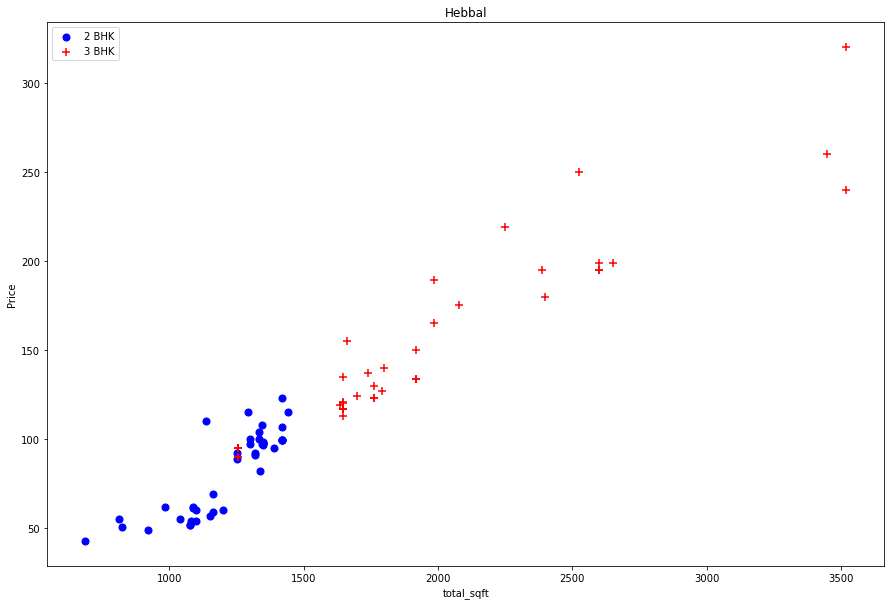

In [80]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

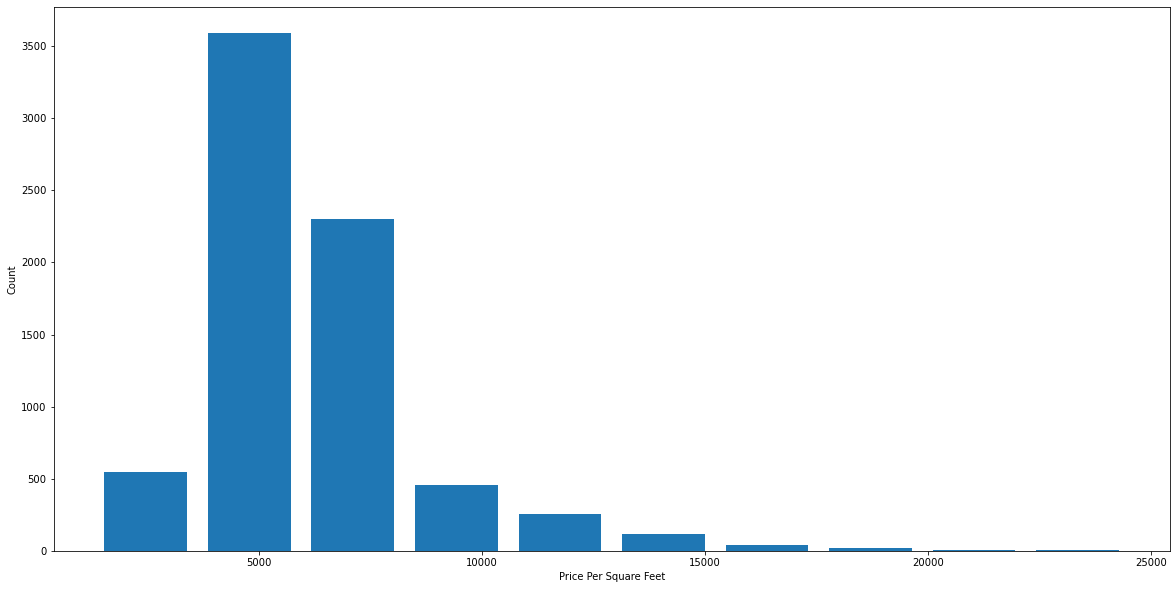

In [84]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [85]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [86]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [87]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

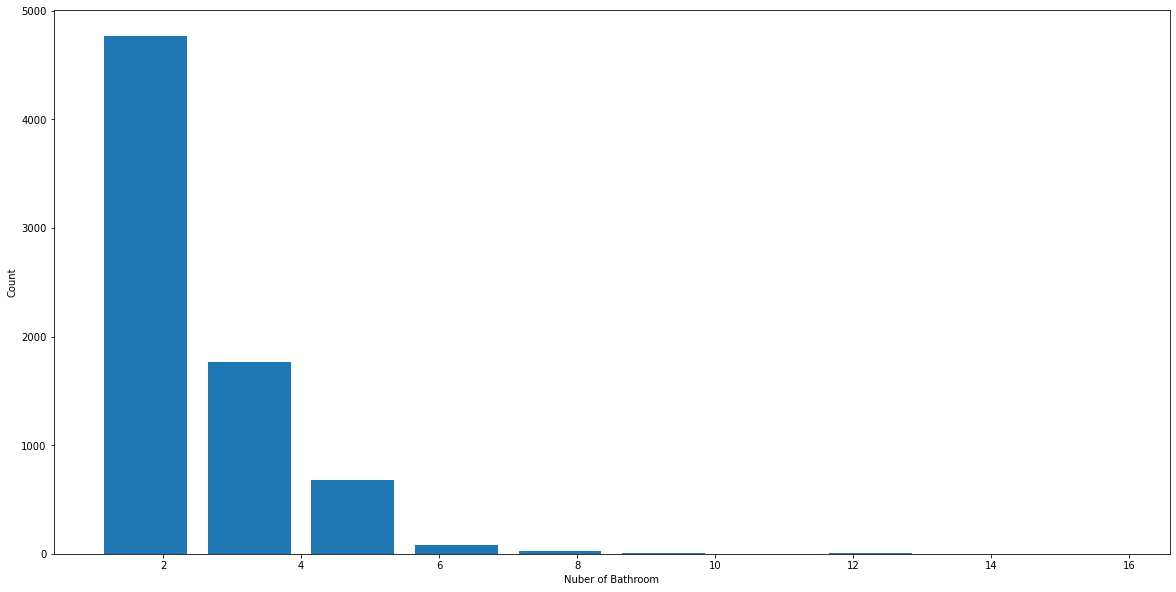

In [89]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('Nuber of Bathroom')
plt.ylabel('Count')

In [90]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [91]:
df9=df8[df8.bath<df8.bhk+2]
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [92]:
df10=df9.drop(['size','price_per_sqft'],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2


In [95]:
dummies=pd.get_dummies(df10.location)

In [98]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df12=df11.drop('location',axis=1)
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X=df12.drop('price',axis=1)
y=df12['price']
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [113]:
from sklearn.linear_model import LinearRegression


In [114]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [115]:
clf.score(X_test,y_test)

0.8716716890993605

In [122]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87346333, 0.79241593, 0.83988954, 0.79197941, 0.8875214 ])

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'Decision_Tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
            
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2)
    for algo_name,config in algos.items():
                cl=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
                cl.fit(X,y)
                scores.append({
                 'model': algo_name,
                 'best_score': cl.best_score_,
                 'best_params': cl.best_params_
                  })
                
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.839834,{'normalize': True}
1,lasso,0.673314,"{'alpha': 2, 'selection': 'random'}"
2,Decision_Tree,0.708986,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [147]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [156]:
type(np.where(X.columns=='2nd Phase Judicial Layout')[0])

numpy.ndarray

In [160]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index >=0:
        x[loc_index]=1
        
    return clf.predict([x])[0]

In [161]:
predict_price('1st Phase JP Nagar',1000,2,3)

86.15035250996229

In [162]:
predict_price('Indira Nagar',1000, 3, 3)


189.2818775574417

# Export the tested model to a pickle file

In [163]:
import pickle
with open('bangalore_price_model.pickle','wb') as f:
    pickle.dump(clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [164]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))